In [1]:
# In this notebook, we explore the Taiwan Credit Default dataset data.

In [2]:
# Import Data handling/display libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the Taiwan Credit Card Default training dataset
Taiwan_df = pd.read_csv('./input/Taiwan-Credit-Card-New.csv')
# Rename a couple of columns for aesthetics
Taiwan_df.rename(columns={'SEX':'GENDER', 'PAY_0': 'PAY_1',
                          'default payment next month':'DEFAULT'}, 
                          inplace=True)
# Drop ID as it has no impact on this study.
Taiwan_df.drop(["ID"], axis=1, inplace=True)

In [4]:
# How many (rows, columns)
Taiwan_df.shape

(30000, 24)

In [5]:
Taiwan_df.sample(5)

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
15226,130000,2,6,1,44,2,2,2,2,0,...,115029,115793,118335,0,11323,0,4294,4700,4260,1
7308,150000,2,1,2,30,-1,-1,-1,0,0,...,6700,7427,13583,0,6700,0,727,13583,4973,0
27842,30000,2,1,2,26,-1,2,2,2,0,...,8240,7027,7034,0,2399,0,388,260,478,0
11362,60000,2,2,2,24,1,-2,-2,-2,-1,...,0,150,560,0,0,0,150,560,1170,0
3233,30000,2,2,1,26,2,2,2,2,2,...,30584,27883,29334,2074,0,2304,0,2400,0,0


In [6]:
Taiwan_df[['GENDER','EDUCATION', 'MARRIAGE', 'AGE']].describe()

,GENDER,EDUCATION,MARRIAGE,AGE
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


In [7]:
Taiwan_df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [8]:
# Unique values of PAY_x
print('Repayment Status: PAY_1 (Sep2005), PAY_2 (Aug2005), PAY_3 (Jul2005)')
print('                  PAY_4 (Jun2005), PAY_5 (May2005), Pay_6 (Apr2005)')
print('-2,0=unknown, -1=pay duly, 1=payment delay by for one month') 
print('2=payment delay for two months, ... 8=payment delay for eight months')
print('PAY_1 Unique values', Taiwan_df.PAY_1.unique())
print('PAY_2 Unique values', Taiwan_df.PAY_2.unique())
print('PAY_3 Unique values', Taiwan_df.PAY_3.unique())
print('PAY_4 Unique values', Taiwan_df.PAY_4.unique())
print('PAY_5 Unique values', Taiwan_df.PAY_5.unique())
print('PAY_6 Unique values', Taiwan_df.PAY_6.unique())

Repayment Status: PAY_1 (Sep2005), PAY_2 (Aug2005), PAY_3 (Jul2005)
                  PAY_4 (Jun2005), PAY_5 (May2005), Pay_6 (Apr2005)
-2,0=unknown, -1=pay duly, 1=payment delay by for one month
2=payment delay for two months, ... 8=payment delay for eight months
PAY_1 Unique values [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 Unique values [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 Unique values [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 Unique values [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 Unique values [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 Unique values [-2  2  0 -1  3  6  4  7  8  5]


In [9]:
# BILL_AMTx description
print('Amount Outstanding: BILL_AMT1 (Sep2005), BILL_AMT2 (Aug2005), BILL_AMT3 (Jul2005)')
print('                    BILL_AMT4 (Jun2005), BILL_AMT5 (May2005), BILL_AMT6 (Apr2005)')
Taiwan_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

Amount Outstanding: BILL_AMT1 (Sep2005), BILL_AMT2 (Aug2005), BILL_AMT3 (Jul2005)
                    BILL_AMT4 (Jun2005), BILL_AMT5 (May2005), BILL_AMT6 (Apr2005)


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [10]:
# PAY_AMTx description
print('Amount Paid: PAY_AMT1 (Sep2005), PAY_AMT2 (Aug2005), PAY_AMT3 (Jul2005)')
print('                    PAY_AMT4 (Jun2005), PAY_AMT5 (May2005), PAY_AMT6 (Apr2005)')
Taiwan_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

Amount Paid: PAY_AMT1 (Sep2005), PAY_AMT2 (Aug2005), PAY_AMT3 (Jul2005)
                    PAY_AMT4 (Jun2005), PAY_AMT5 (May2005), PAY_AMT6 (Apr2005)


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


AxesSubplot(0.125,0.125;0.775x0.755)


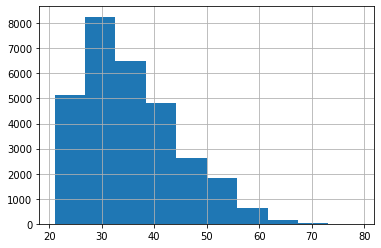

In [11]:
# What is the age distribution
print(Taiwan_df.AGE.hist())

In [12]:
# How many people are married etc. (1 = married; 2 = single; 3,0 = others)
Taiwan_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

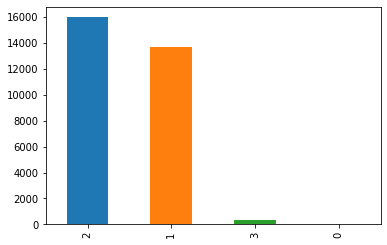

In [13]:
# Plot distribution of Marriage (1 = married; 2 = single; 3,0 = others)
Taiwan_df.MARRIAGE.value_counts().plot(kind = 'bar')

In [14]:
# Educational distribution (1=grad school; 2=university; 3=high school; 0,4, 5, 6=others)
Taiwan_df.EDUCATION.value_counts() 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [15]:
# Count how many men(1) & women (2)
Taiwan_df.GENDER.value_counts()

2    18112
1    11888
Name: GENDER, dtype: int64

In [16]:
### get into the meat of whats what
gender = Taiwan_df.groupby(['GENDER', 'DEFAULT']).size().unstack(1)
# 1 is the default for unstack, but I put it to show explicitly what we are unstacking
gender

DEFAULT,0,1
GENDER,,
1,9015,2873
2,14349,3763


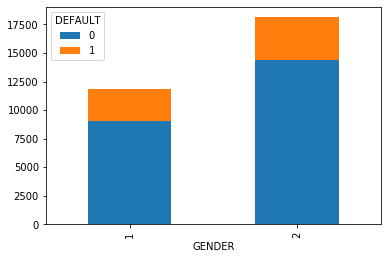

In [17]:
# Plot chart of number of women who've defaulted etc.
gender.plot(kind='bar', stacked = True)

In [18]:
# Use this to get the average of all columns for each value of DEFAULT
Taiwan_df.groupby('DEFAULT').mean()


,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
DEFAULT,,,,,,,,,,,,,,,,,,,,,
0,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [19]:
## display(Markdown("#### Training Dataset shape"))
## print(dataset_orig_train.features.shape)
#Taiwan_df.info()